In [49]:
# Imports required libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Reads the 'credit.csv' file and assigns it to a Pandas DataFrame named 'df'
df = pd.read_csv('credit.csv')

In [51]:
# Display the first few rows of the dataset
print(df.head())

      ID  Customer_ID  Month       Name  Age        SSN Occupation  \
0  79590        34851      1  a Coopert   54  220681404   Musician   
1  79591        34851      2  a Coopert   54  220681404   Musician   
2  79592        34851      3  a Coopert   54  220681404   Musician   
3  79593        34851      4  a Coopert   54  220681404   Musician   
4  79594        34851      5  a Coopert   54  220681404   Musician   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       94639.11              7705.5925                  3  ...    Standard   
1       94639.11              7705.5925                  3  ...    Standard   
2       94639.11              7705.5925                  3  ...    Standard   
3       94639.11              7705.5925                  3  ...    Standard   
4       94639.11              7705.5925                  3  ...    Standard   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            680.76                 

In [52]:
# Summary 
print(df.describe())

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417 

In [53]:
# Data types of columns
print(df.dtypes)

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                           int64
SSN                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [54]:
# Check for missing values
print(df.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [55]:
# No missing values 

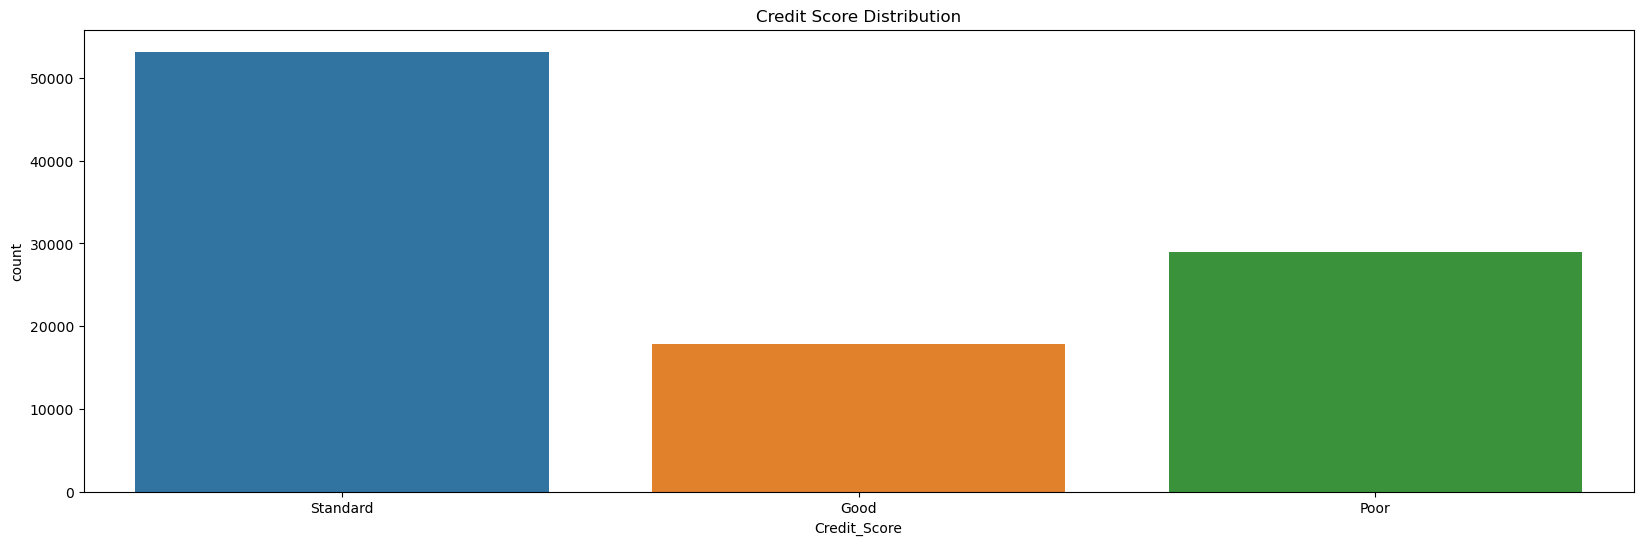

In [56]:
#creddit score distribution countplot
plt.figure(figsize=(20,6))
sns.countplot(x='Credit_Score', data=df)
plt.title('Credit Score Distribution')
plt.show()


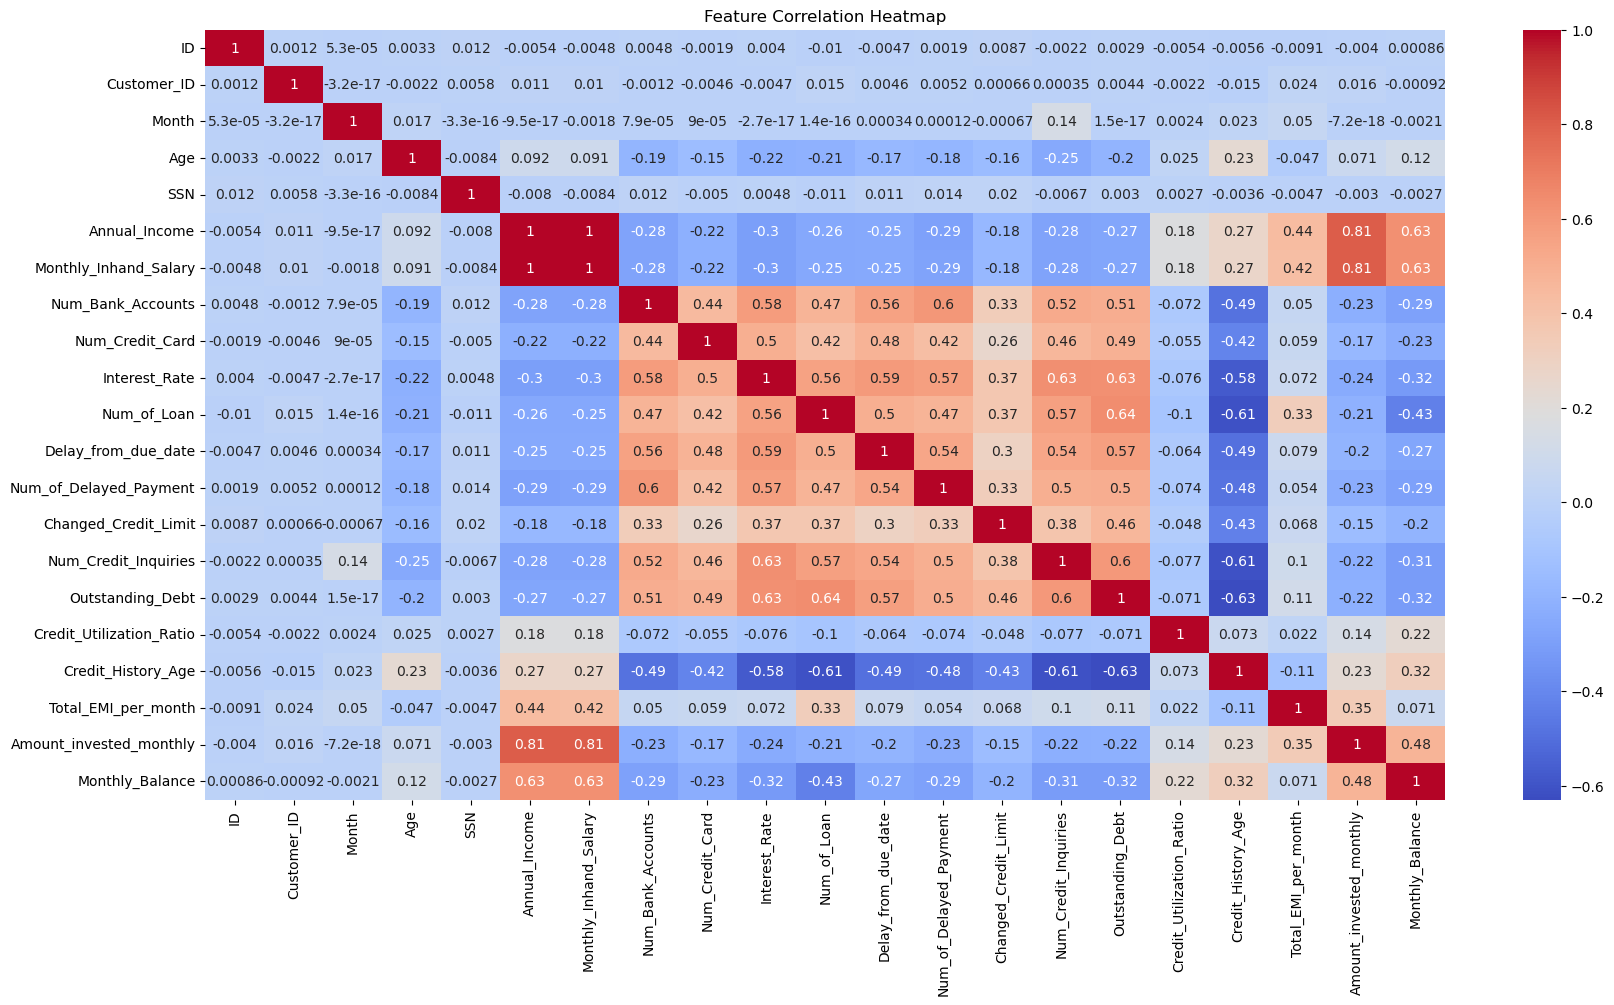

In [57]:
# Correlation matrix calculates the correlation coefficient values between numerical features
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [58]:
numerical_cols = ['Month','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
                  'Delay_from_due_date','Num_of_Delayed_Payment','Num_of_Loan', 'Credit_Utilization_Ratio',
                  'Changed_Credit_Limit','Credit_Utilization_Ratio','Outstanding_Debt','Credit_History_Age',
                  'Total_EMI_per_month', 'Amount_invested_monthly']


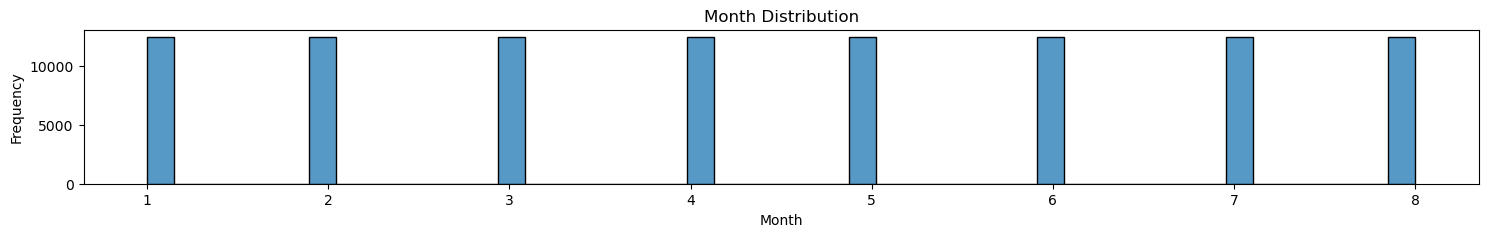

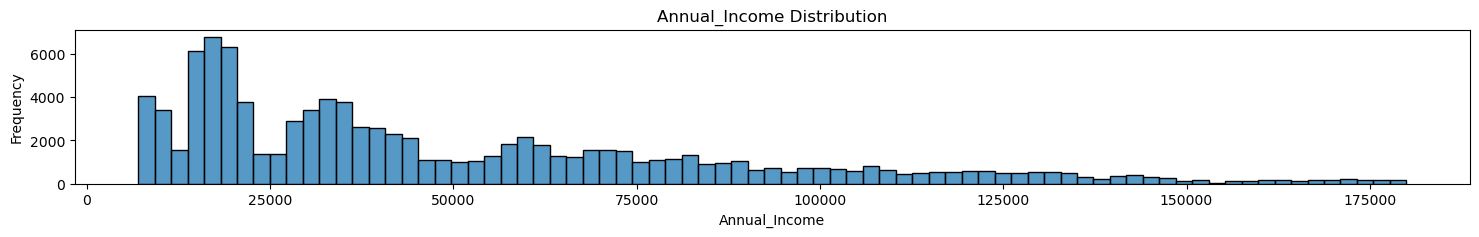

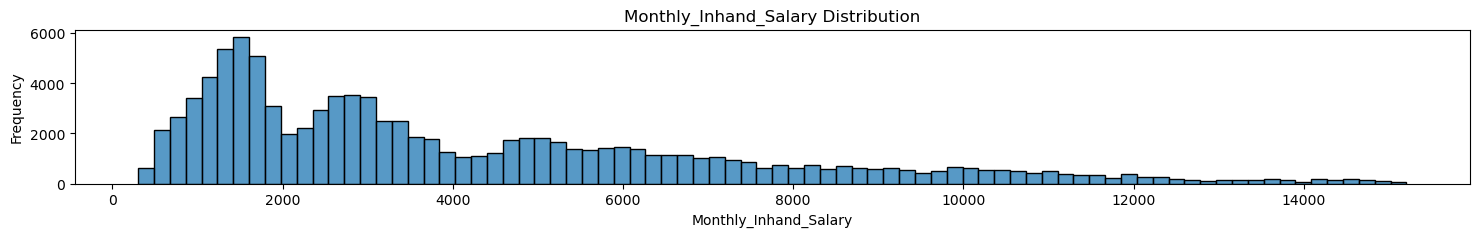

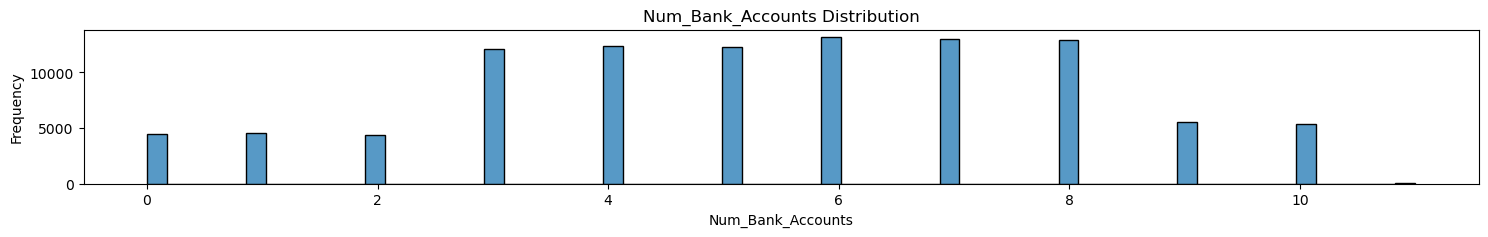

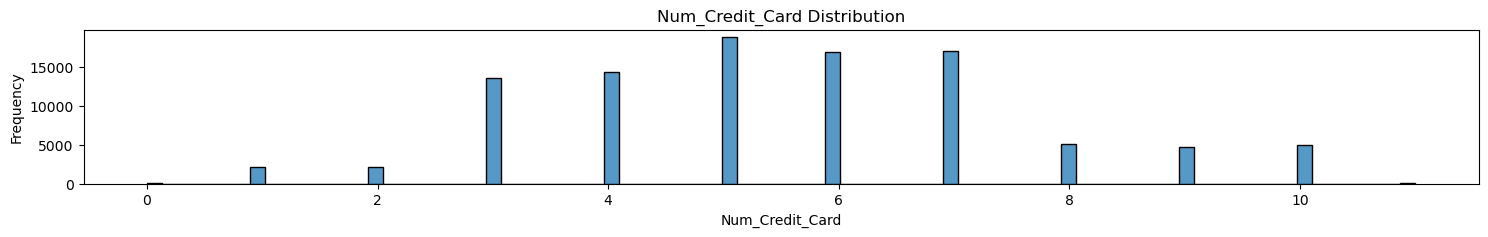

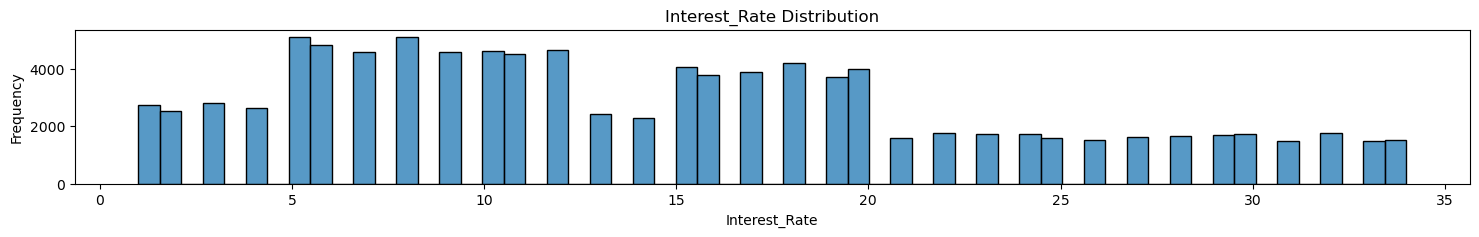

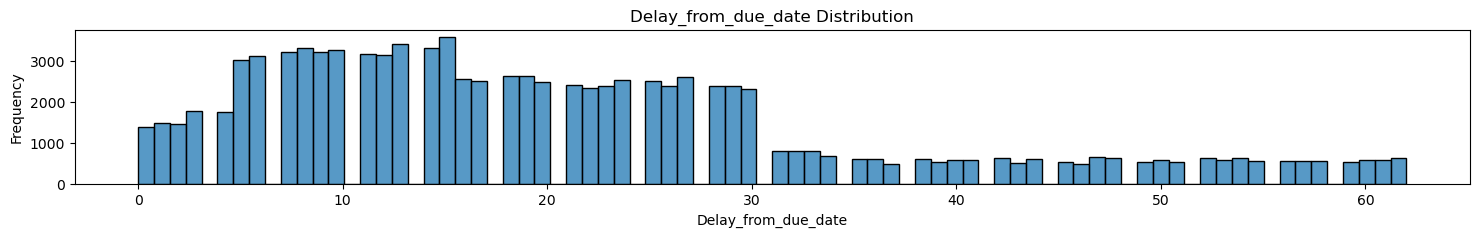

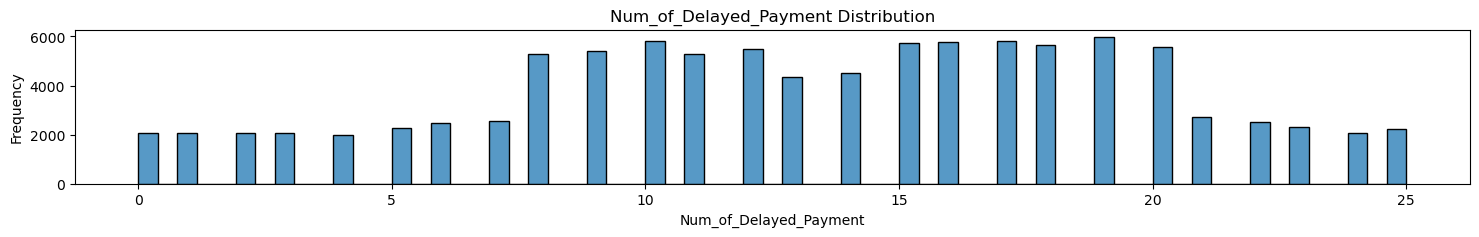

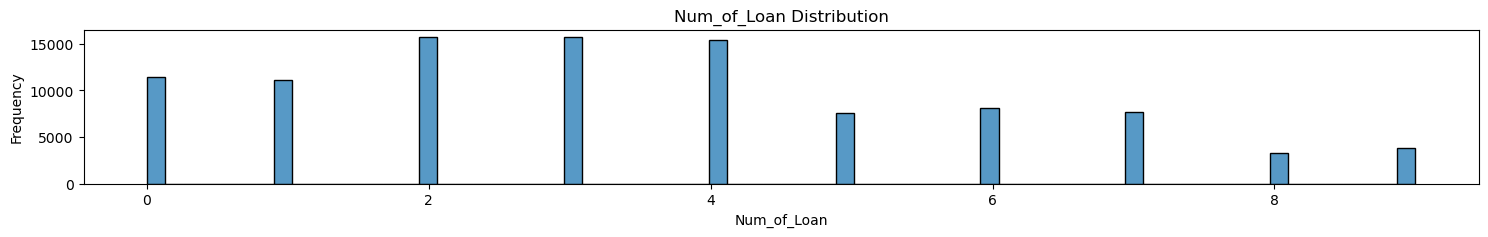

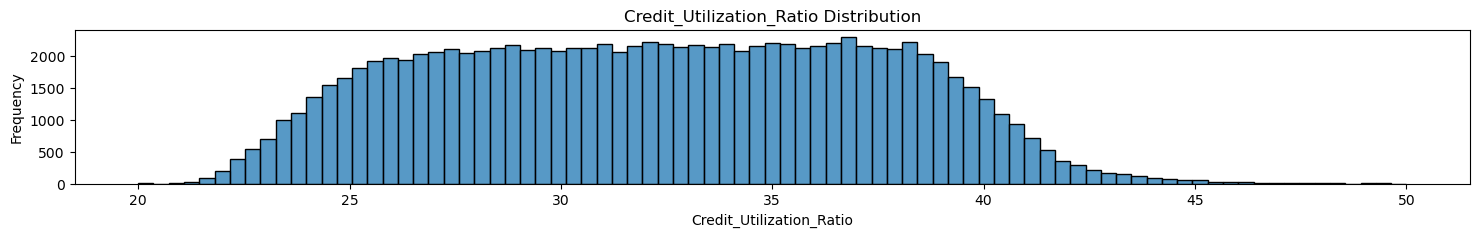

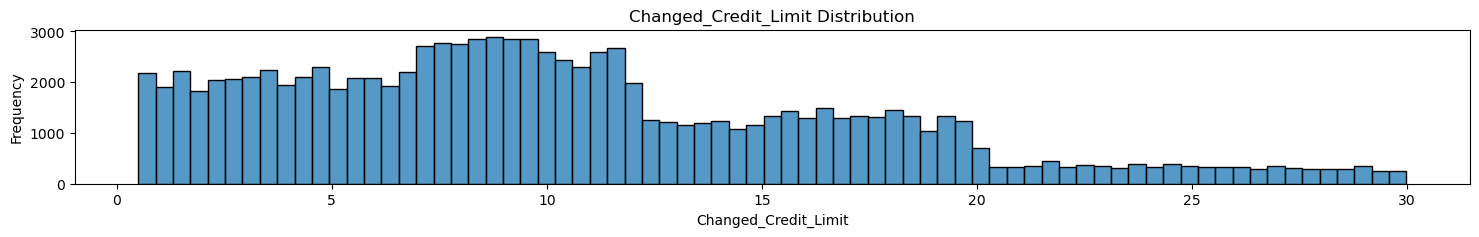

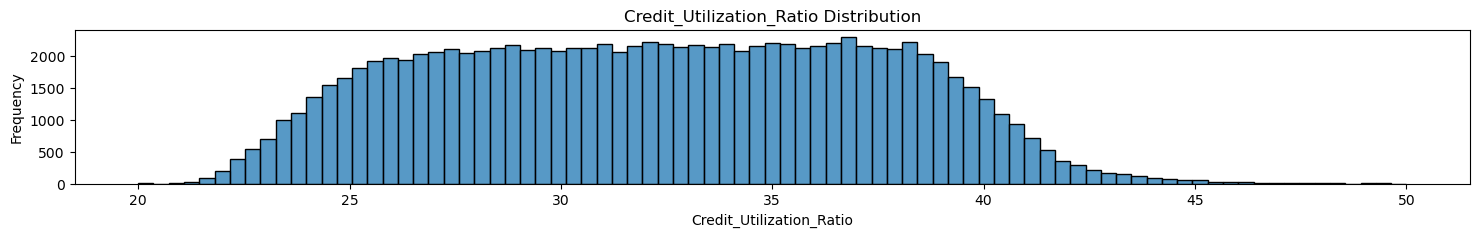

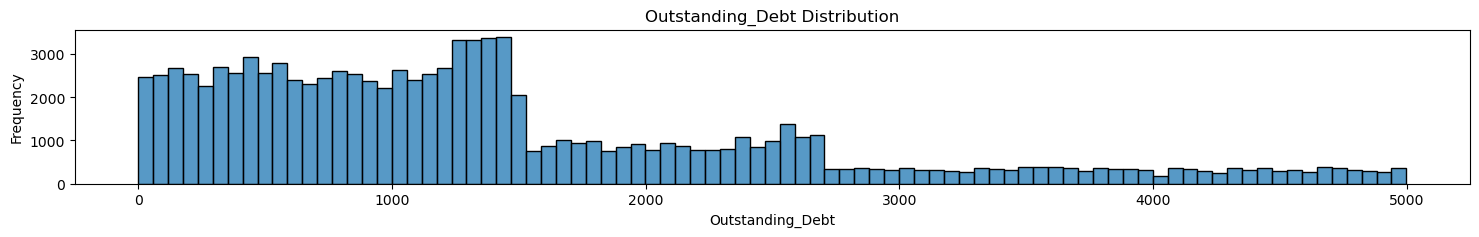

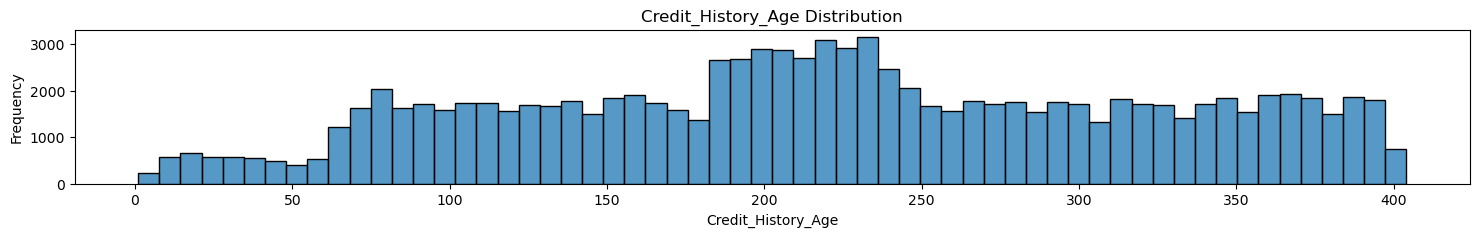

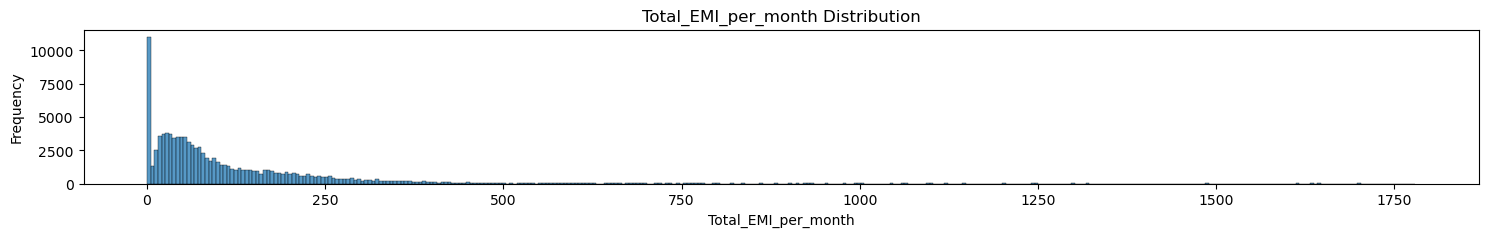

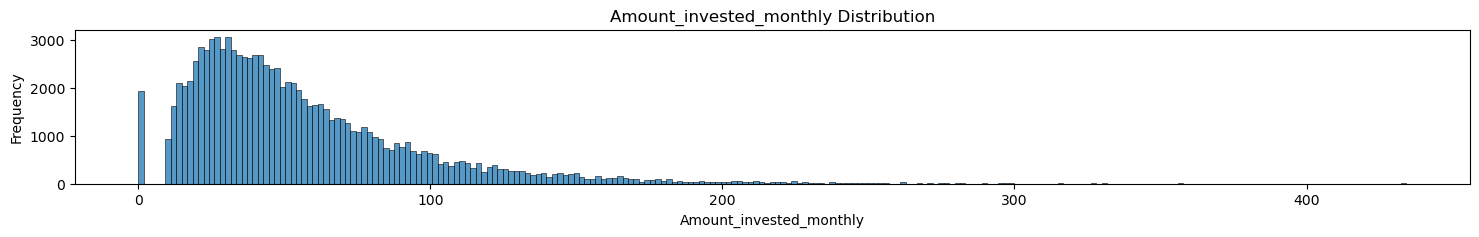

In [59]:
# Display histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(18,2))
    sns.histplot(df[col], kde=False)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [60]:
categorical_cols = ['Occupation','Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount']


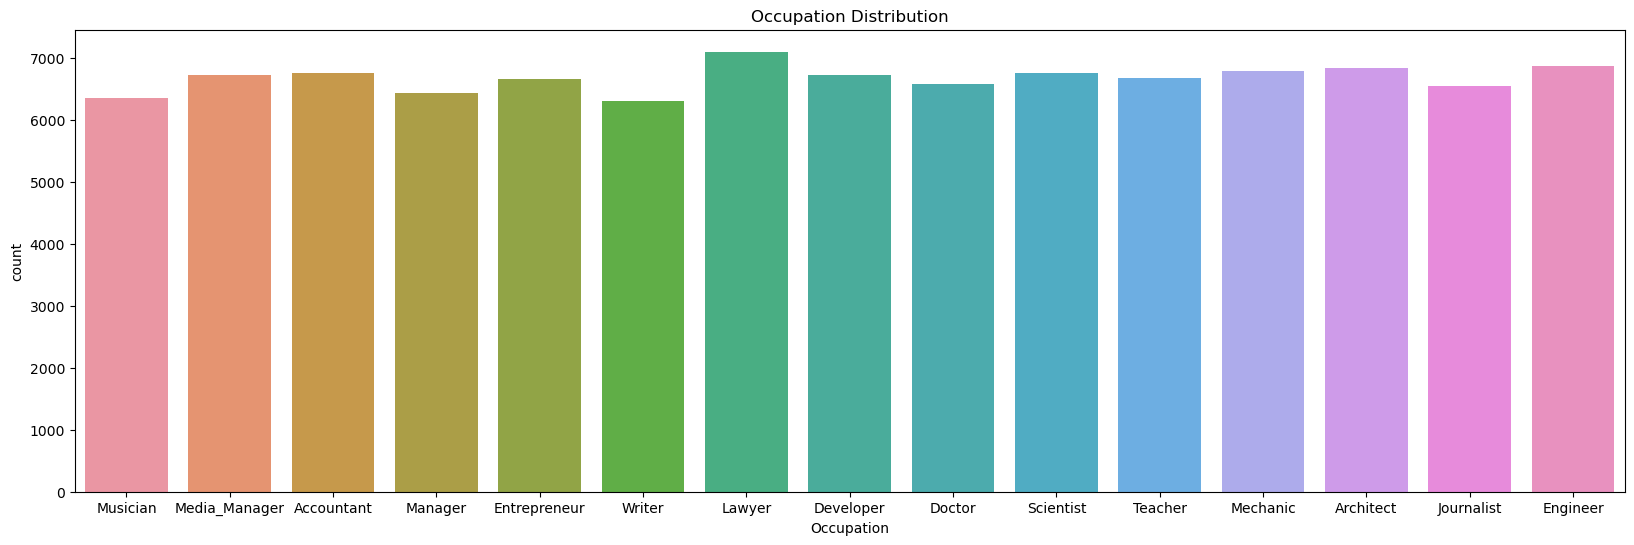

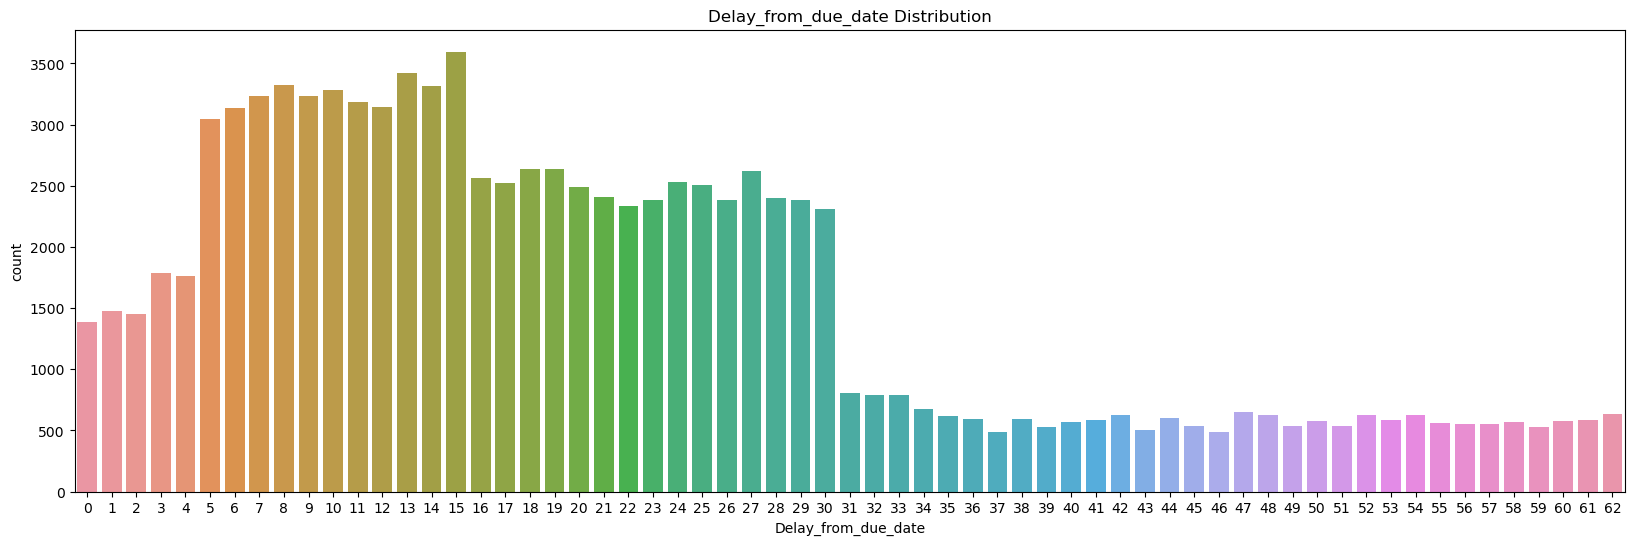

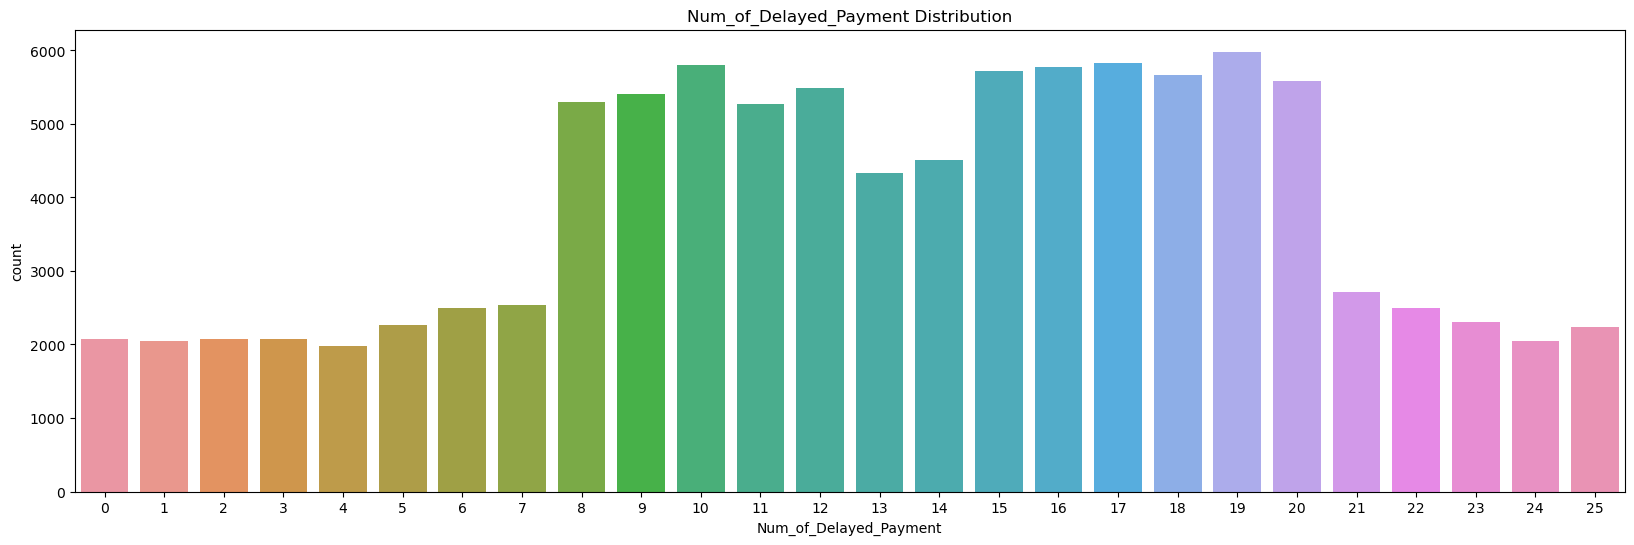

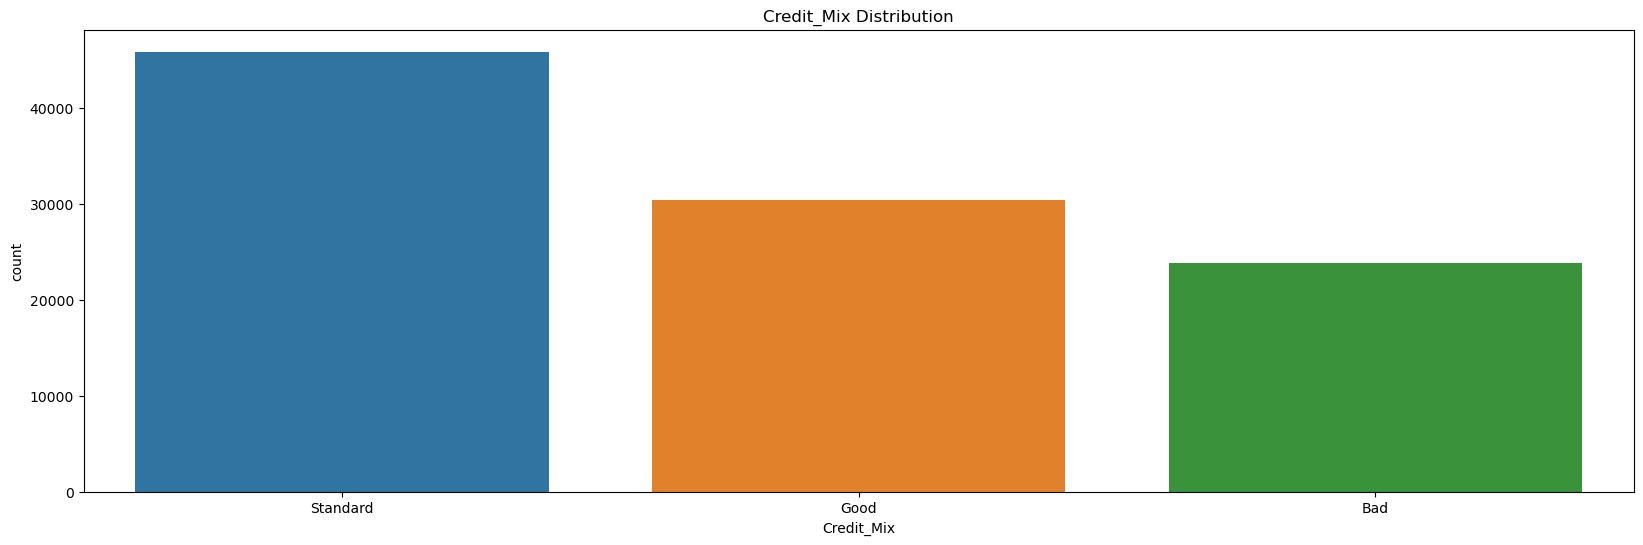

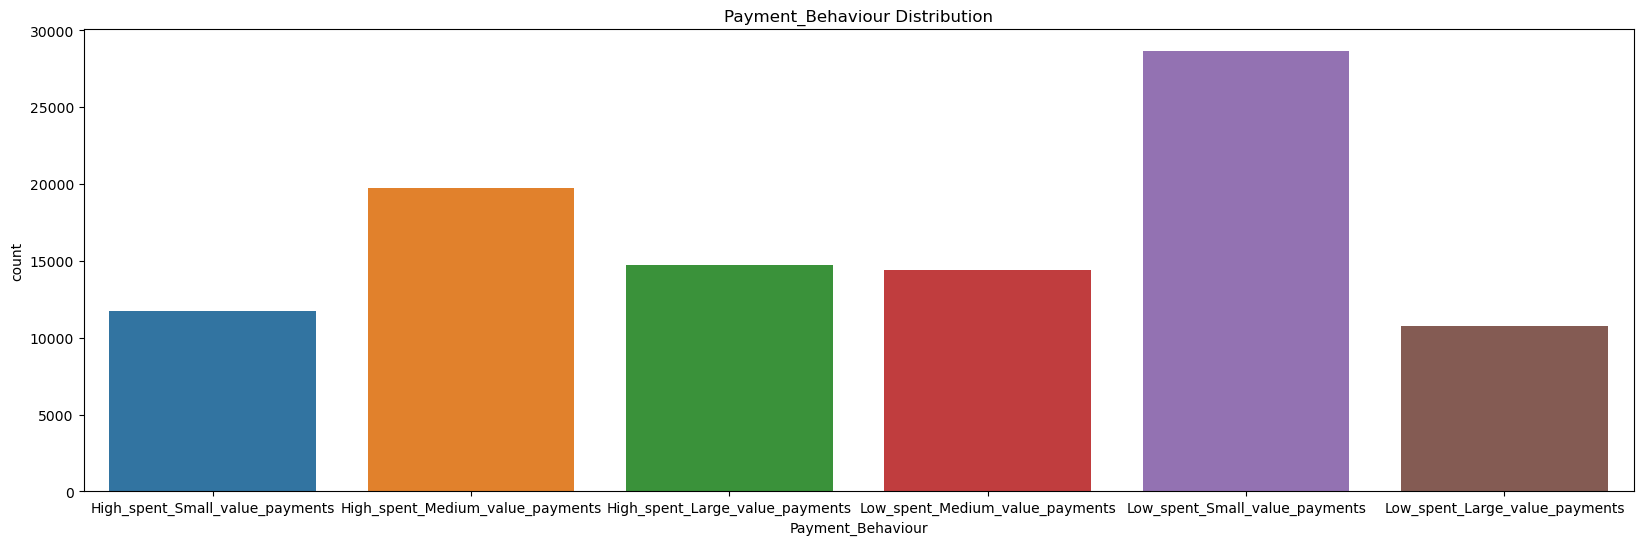

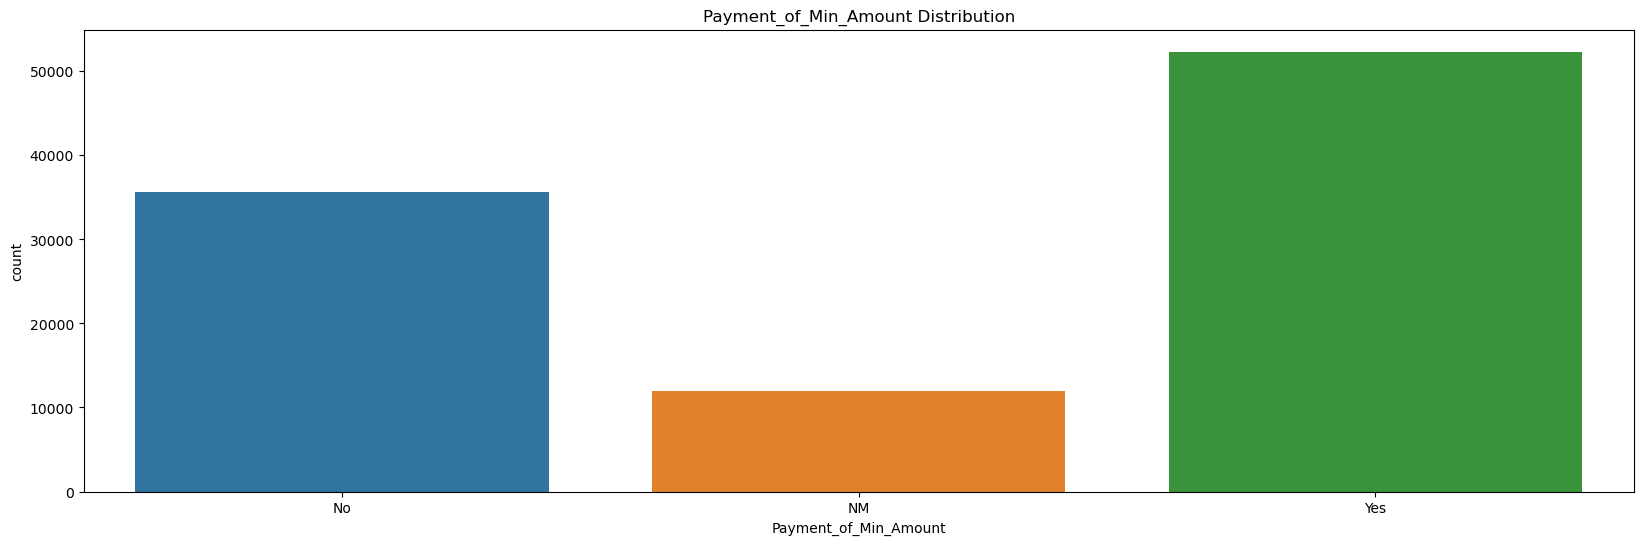

In [61]:
# Display countplots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

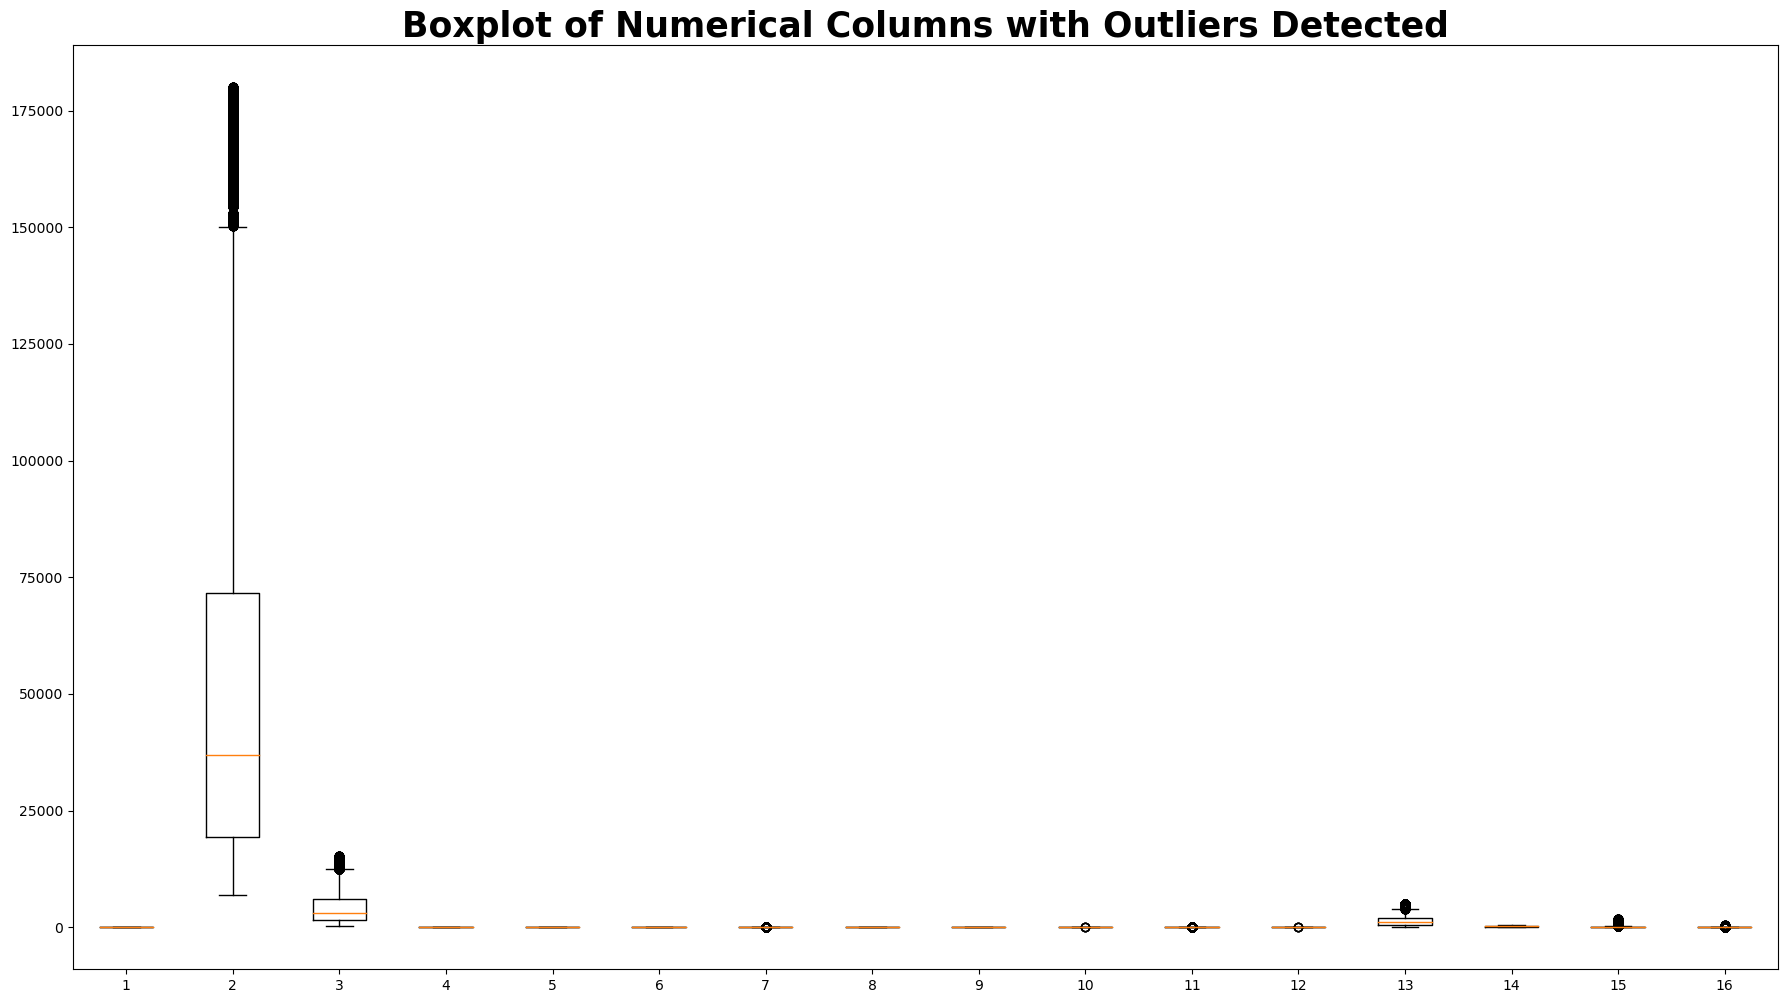

In [62]:
# Display the boxplot of numerical columns to detect outliers visually
plt.figure(figsize=(22, 12))

# using boxplot
box_plot = plt.boxplot(df[numerical_cols].to_numpy())

plt.title("Boxplot of Numerical Columns with Outliers Detected", fontweight="bold", fontsize=25)
plt.show()


In [63]:
# Calculatig and detects outliers in numerical columns based on the establishing a threshold of 1.5 times the IQR

for i, col in enumerate(numerical_cols):
    if df[col].dtype.kind in {'i', 'f', 'u'}:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        outliers = df[(df[col] > upper) | (df[col] < lower)]

        print(f"{col} column: {len(outliers)} outliers detected")
    else:
        print(f"{col} column: No outlier detection provided (non-numeric column)")#

Month column: 0 outliers detected
Annual_Income column: 2000 outliers detected
Monthly_Inhand_Salary column: 2017 outliers detected
Num_Bank_Accounts column: 0 outliers detected
Num_Credit_Card column: 0 outliers detected
Interest_Rate column: 0 outliers detected
Delay_from_due_date column: 4002 outliers detected
Num_of_Delayed_Payment column: 0 outliers detected
Num_of_Loan column: 0 outliers detected
Credit_Utilization_Ratio column: 4 outliers detected
Changed_Credit_Limit column: 579 outliers detected
Credit_Utilization_Ratio column: 4 outliers detected
Outstanding_Debt column: 5272 outliers detected
Credit_History_Age column: 0 outliers detected
Total_EMI_per_month column: 5044 outliers detected
Amount_invested_monthly column: 4464 outliers detected


In [64]:
# Numerical and Categorical columns were detected.(float, int, and object are found)
# No null values were detected. 
# Outliers were detected in numerical columns.